In [81]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Dataset Loading **Read Dataset**

In [82]:
df = pd.read_csv("day.csv")

*Inspecting* *the* *dataset*

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
#The data has no null values and it contains int,object,float datatypes


In [85]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [86]:
df.shape

(730, 16)

In [87]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no missing values in the data

Let's divide the continuous numerical variables and categorical variables

In [88]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [89]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [90]:
df.registered.value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

Let's drop the duplicate values from our dataset

In [91]:
df.drop_duplicates(subset=None,inplace=True)

In [92]:
df.shape

(730, 16)

As we can see after the dropping of the duplicate values from the dataset we don't see any changes in the shape of the dataset we have .. hence, there is no duplicate values

In [93]:
df['instant']

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

Based on the inspection of the dataset and data dictionary , we could drop the following columns from further analysis:

1. ***instant*** : represents index value.

2. ***dteday*** : This column consists of the date , as we have separate columns for year and month, we can drop this column.

3. ***casual&registered*** : as our main intention here is to just improve the business and not to see the comparision between casual users and registered users, we can drop this info from the dataset.

In [94]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

***Let's do the EDA for the dataset to see the trend in the dataset***

# ***Let's do a simple EDA on the numerical and categorical columns from original dataset***

In [95]:

numerical_cols=['instant','temp','atemp','hum','windspeed','casual','registered','cnt']
categorical_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

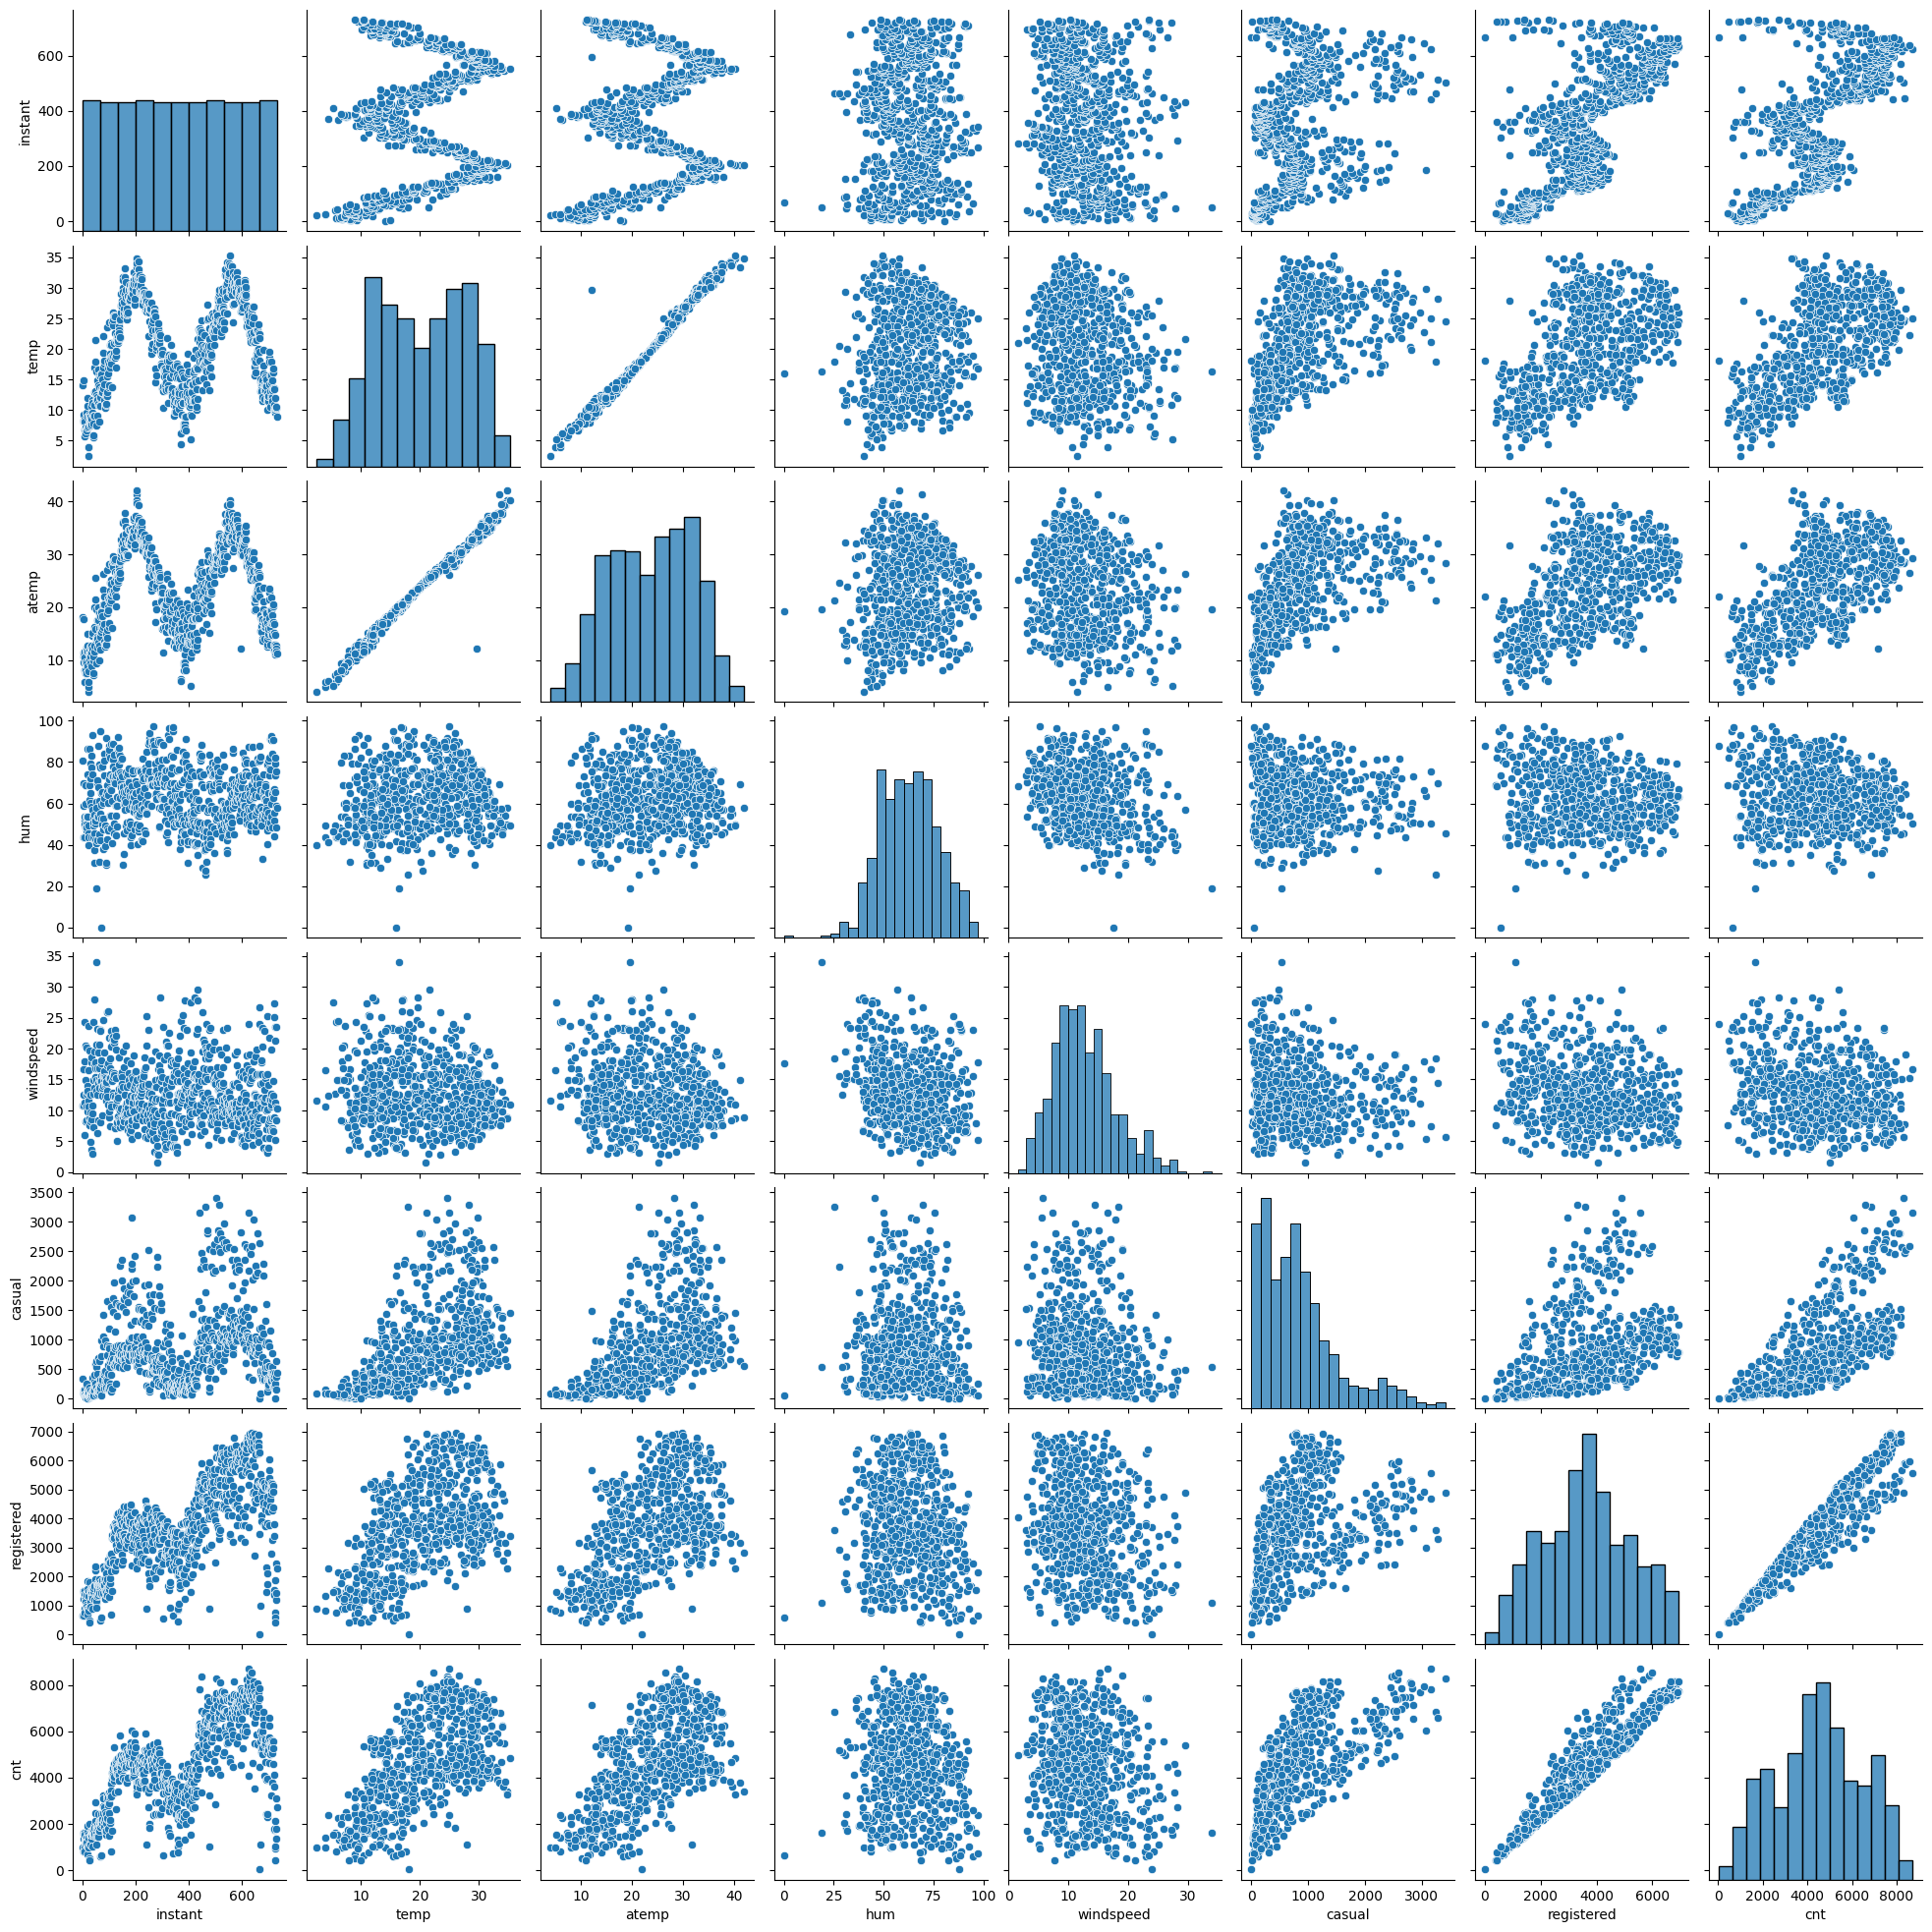

In [96]:
sns.pairplot(df[numerical_cols])



1. **We can see the linear relationship between target variable 'cnt' with 'temp','atemp','casual'**
2. **casual and temp has good linear relationship**
3. **temp atemp has a good linear relationship**
4. **temp casual has a good linear relationship**




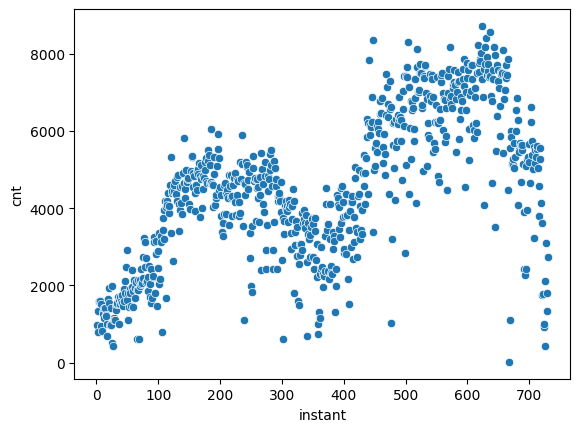

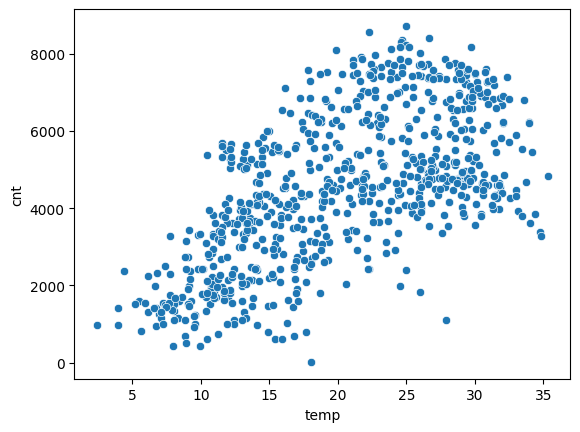

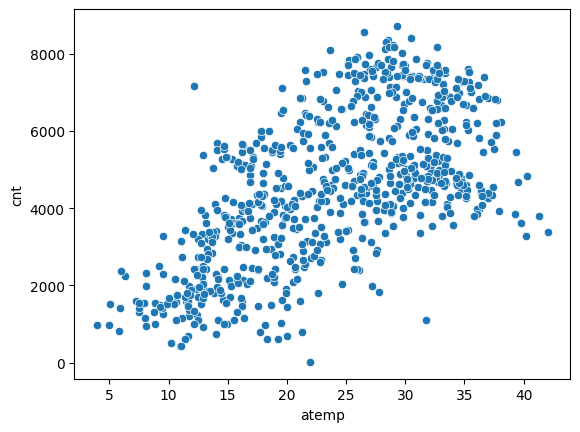

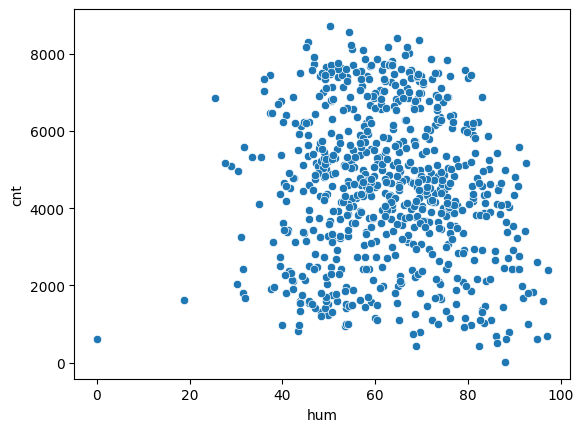

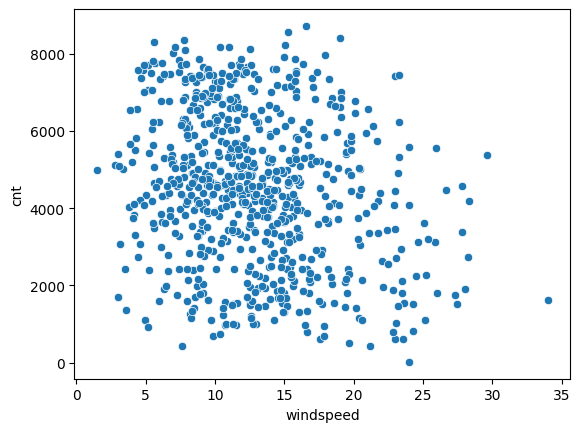

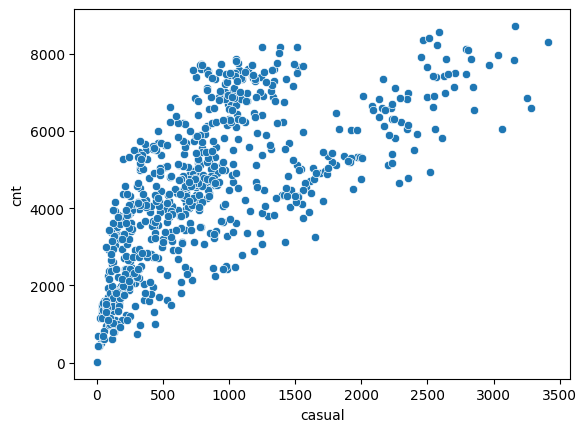

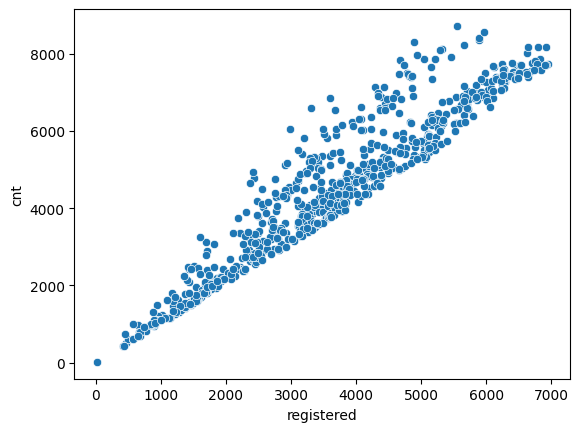

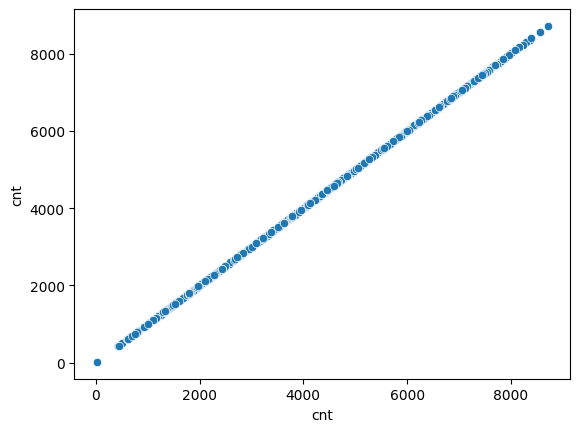

In [97]:
# Also let's see that using a scatter plot separately for numerical variables
# We could also see the relationship using the Boxplot for categorical variables

for i in numerical_cols:
  sns.scatterplot(x=df[i],y=df['cnt'])
  plt.show()


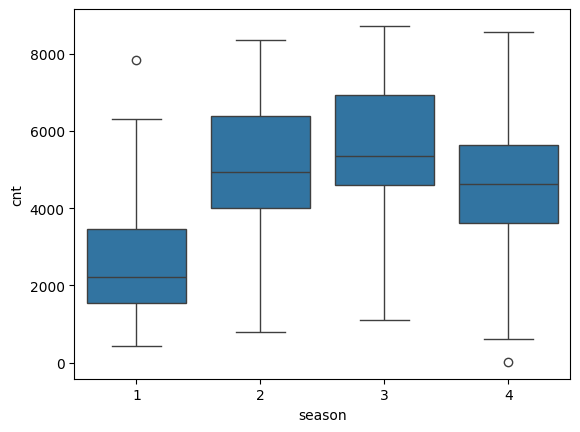

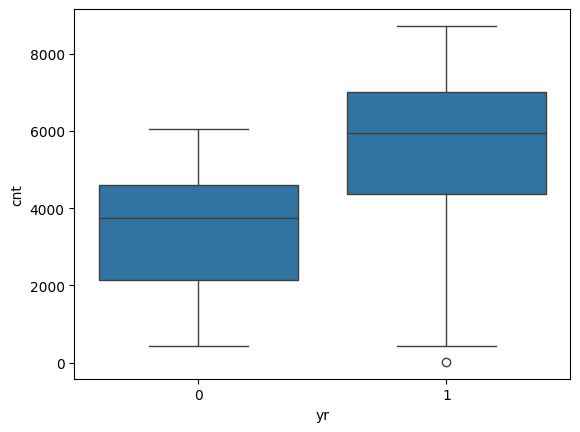

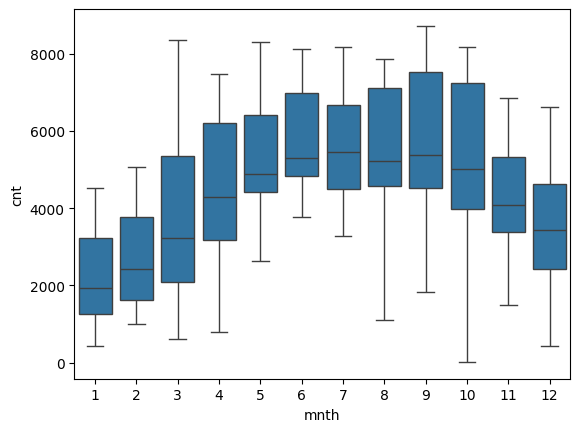

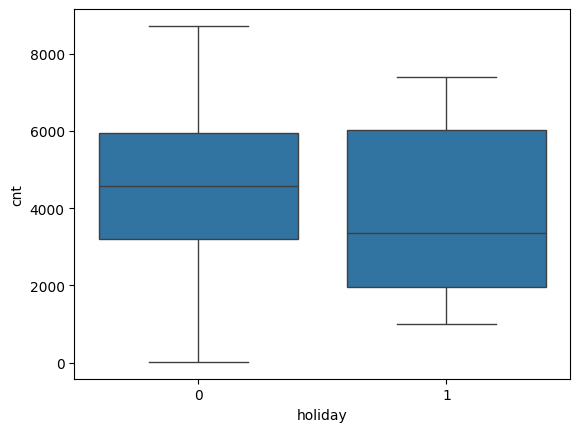

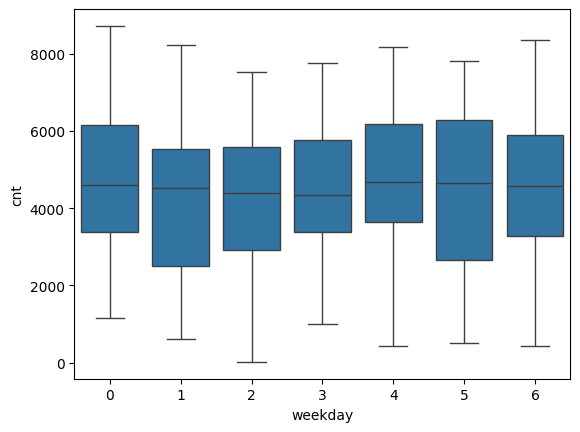

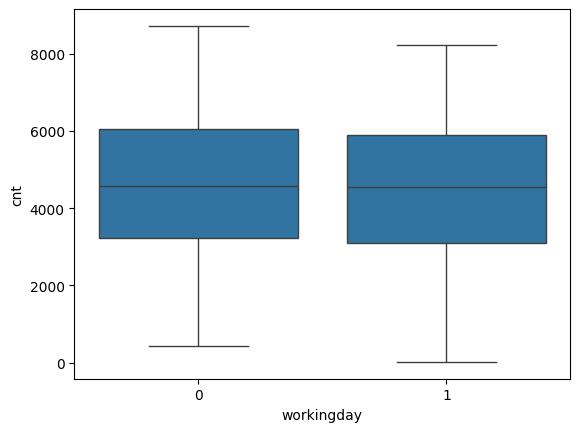

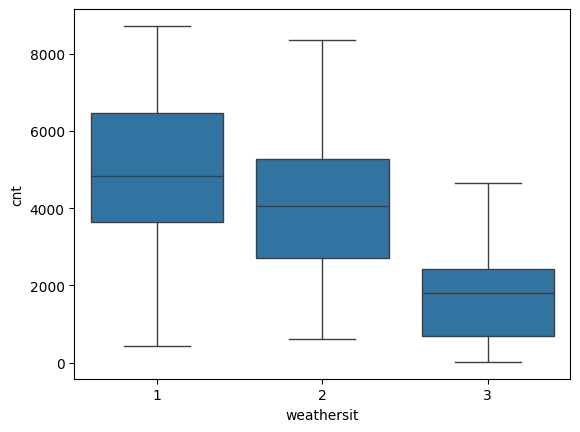

In [98]:
for i in categorical_cols:
  sns.boxplot(x=df[i],y=df['cnt'])
  plt.show()

1. **The count of rental bikes is high in seasons such as "summer","fall" and "winter" and it's very low in " spring" season**

2. **The count of rental bikes is very high in the year 2019 compared to 2018**

3. **The count of rental bikes is very high in month 3,4,5,6,7,8,9,10**

4. **If the weather is clear the demand is high,
If it's cloudy and misty then a bit low in demand
If there is light snow,light rain,thunderstorm,scattered clouds then the demand for rental bikes is very low**

***Let's create a new dataset, so that we do not do changes in the original dataset***

In [99]:
df_new = df[['temp','atemp','hum','windspeed','cnt','season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [100]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   cnt         730 non-null    int64  
 5   season      730 non-null    int64  
 6   yr          730 non-null    int64  
 7   mnth        730 non-null    int64  
 8   holiday     730 non-null    int64  
 9   weekday     730 non-null    int64  
 10  workingday  730 non-null    int64  
 11  weathersit  730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


# We need to create Dummy Variables for various categorical variables present in the new dataset that is created after dropping the necessary columns

Dummy Variables to be created for columns "mnth","weekday","season:",& "weathersit"

In [101]:
# Convert into category datatype

df_new['mnth'] = df_new['mnth'].astype('category')
df_new['weekday'] = df_new['weekday'].astype('category')
df_new['season'] = df_new['season'].astype('category')
df_new['weathersit'] = df_new['weathersit'].astype('category')


In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   temp        730 non-null    float64 
 1   atemp       730 non-null    float64 
 2   hum         730 non-null    float64 
 3   windspeed   730 non-null    float64 
 4   cnt         730 non-null    int64   
 5   season      730 non-null    category
 6   yr          730 non-null    int64   
 7   mnth        730 non-null    category
 8   holiday     730 non-null    int64   
 9   weekday     730 non-null    category
 10  workingday  730 non-null    int64   
 11  weathersit  730 non-null    category
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


Create Dummy variable for the entire new data.

In [103]:
df_new = pd.get_dummies(df_new,drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   yr            730 non-null    int64  
 6   holiday       730 non-null    int64  
 7   workingday    730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [104]:
df_new.shape

(730, 30)

***We can see that there are multiple new columns added which are the dummy variable created, as we need the numerical variables to train the ML model***

# Let's start doing a model training using sklearn library

In [105]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train , df_test = train_test_split(df_new,train_size=0.70,test_size = 0.30, random_state = 100)

# Verifying the shape of the split data

In [106]:
print(df_new.shape)

print(df_train.shape)

print(df_test.shape)

(730, 30)
(510, 30)
(219, 30)


# Let's perform EDA on training dataset

In [107]:
#Let's make the visualisation for numerical variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          510 non-null    float64
 1   atemp         510 non-null    float64
 2   hum           510 non-null    float64
 3   windspeed     510 non-null    float64
 4   cnt           510 non-null    int64  
 5   yr            510 non-null    int64  
 6   holiday       510 non-null    int64  
 7   workingday    510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [108]:
df_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr', 'holiday',
       'workingday', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

*Let's create only a dataframe for numeric* *variable*

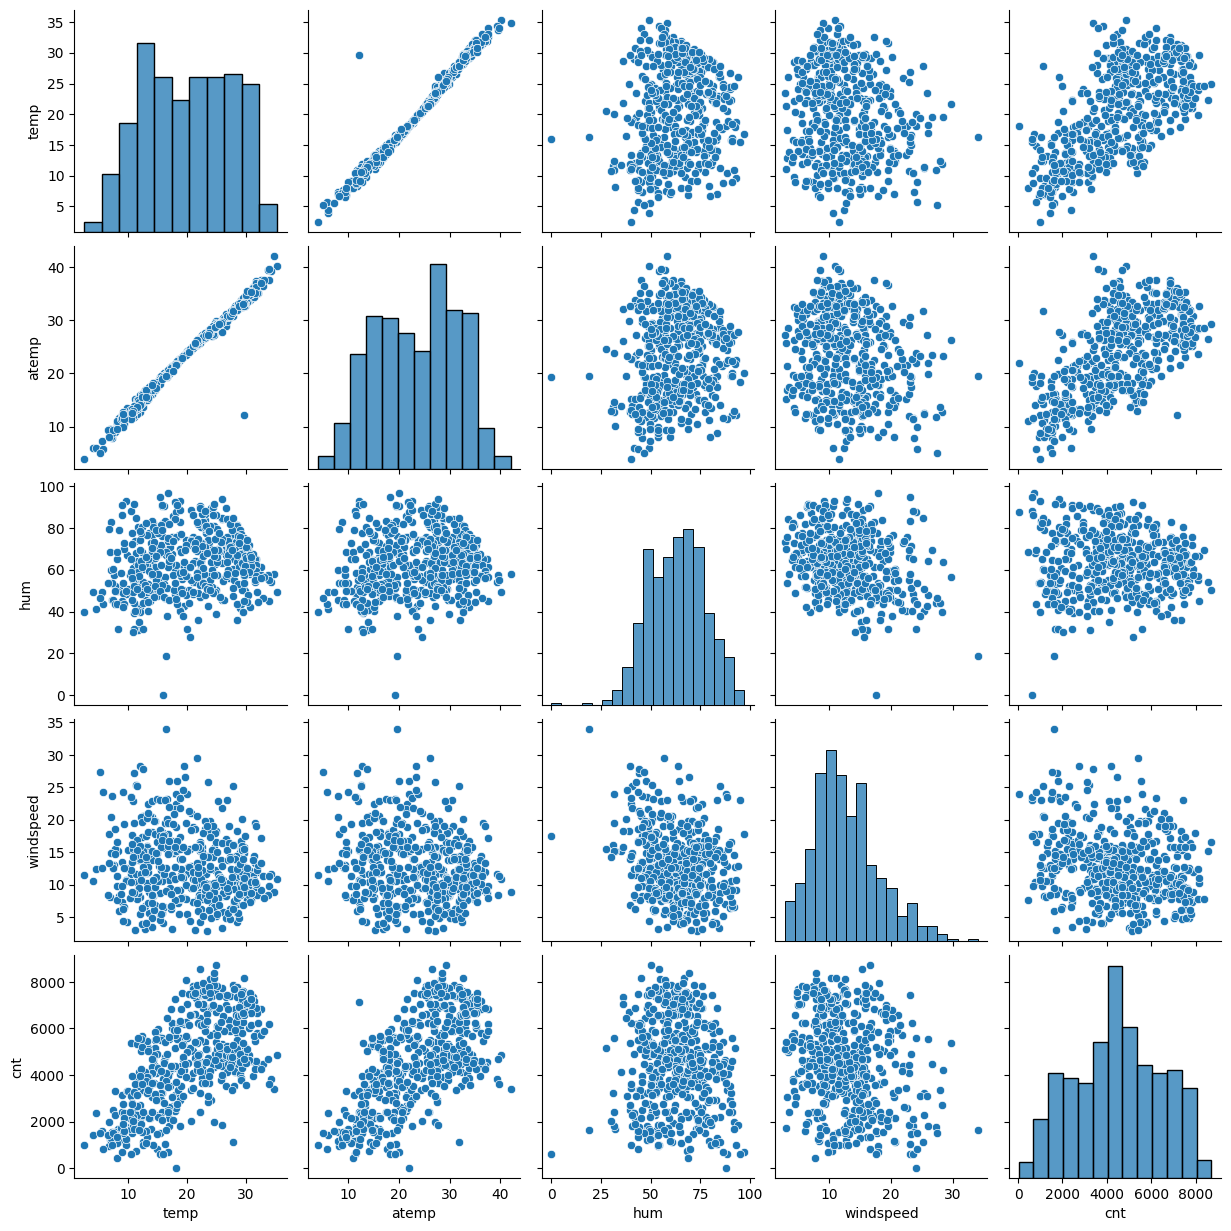

In [109]:
df_train_num = df_train[['temp','atemp','hum','windspeed','cnt']]


sns.pairplot(df_train_num)
plt.show()

# The above pairplot tells us that there is linear relationship between 'temp','atemp', and 'cnt'

***Let's visualise the categorical*** ***variables***

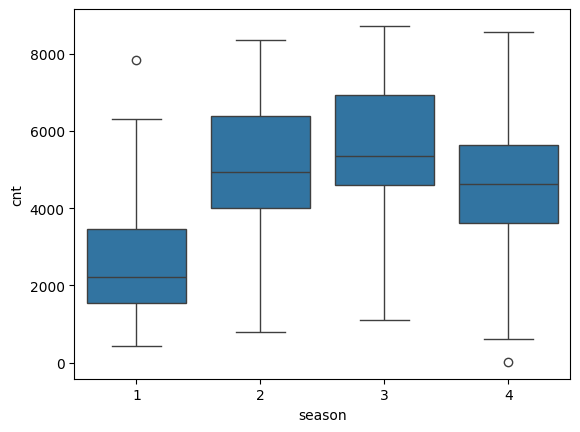

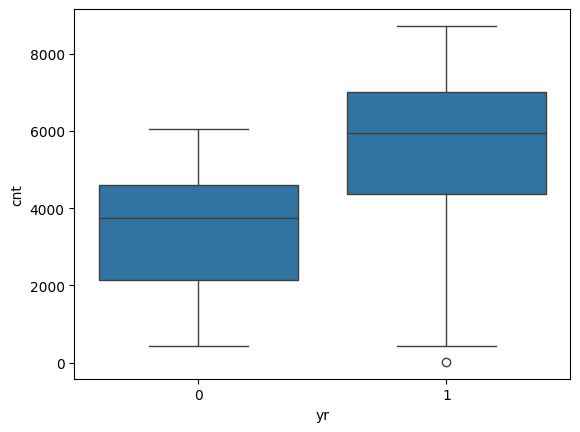

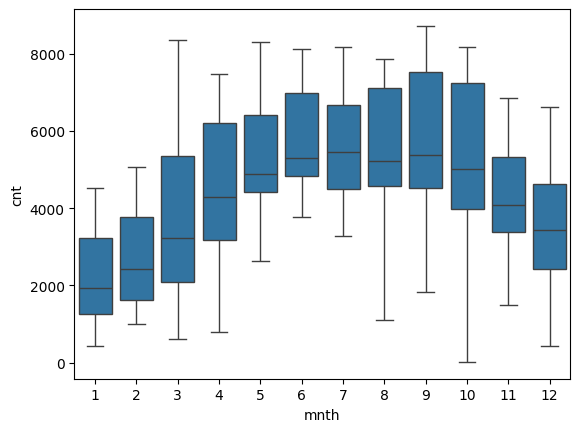

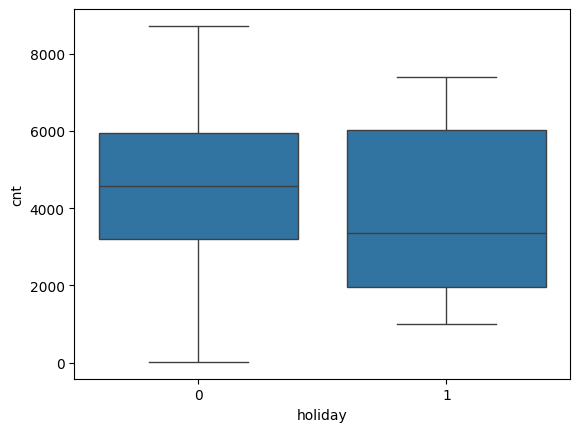

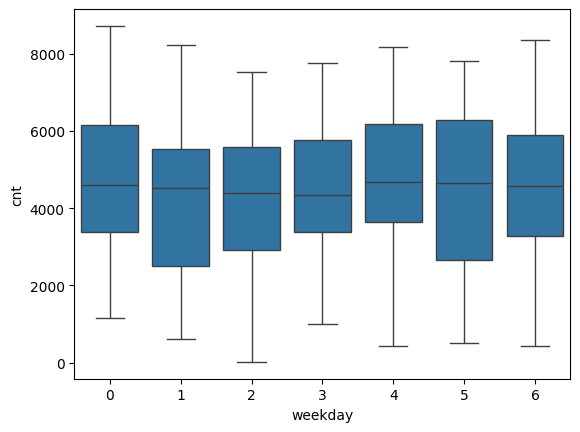

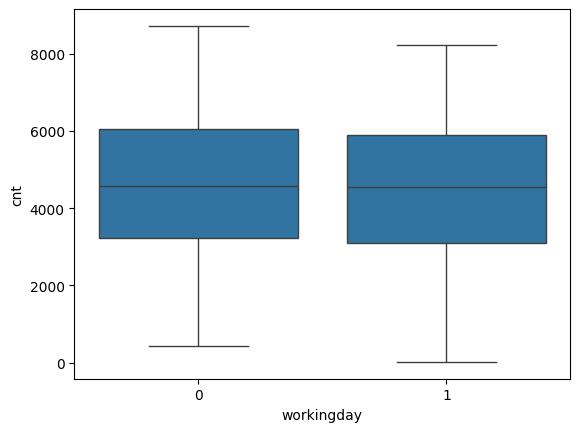

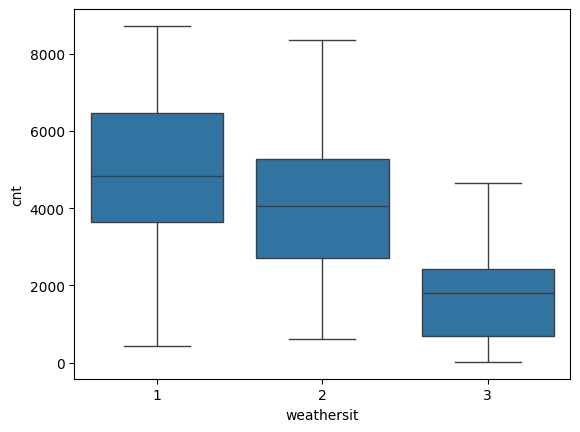

In [110]:
for i in categorical_cols:
  sns.boxplot(x=df[i],y=df['cnt'],data=df)
  plt.show()

After looking at the categorical visualisation of the data, it is clear that:

      1. **Season : can be a good predictor for the dependent variable('cnt').**

      2. **mnth :** **Can be a good predictor for the dependent variable**

      3. **weathersit : Can be a good predictor for the dependent variable**

      4. **holiday : Holiday can't be a good predictor as we can see in the visual above**

      5. **weekday : It almost has equal contribution for all days of the week, we can decide it later**

      6. **workingday : Can be a good predictor**

**Let's do the multi-variate analysis and see if we could manually delete the columns that have resemblance with other columns.**


<Axes: >

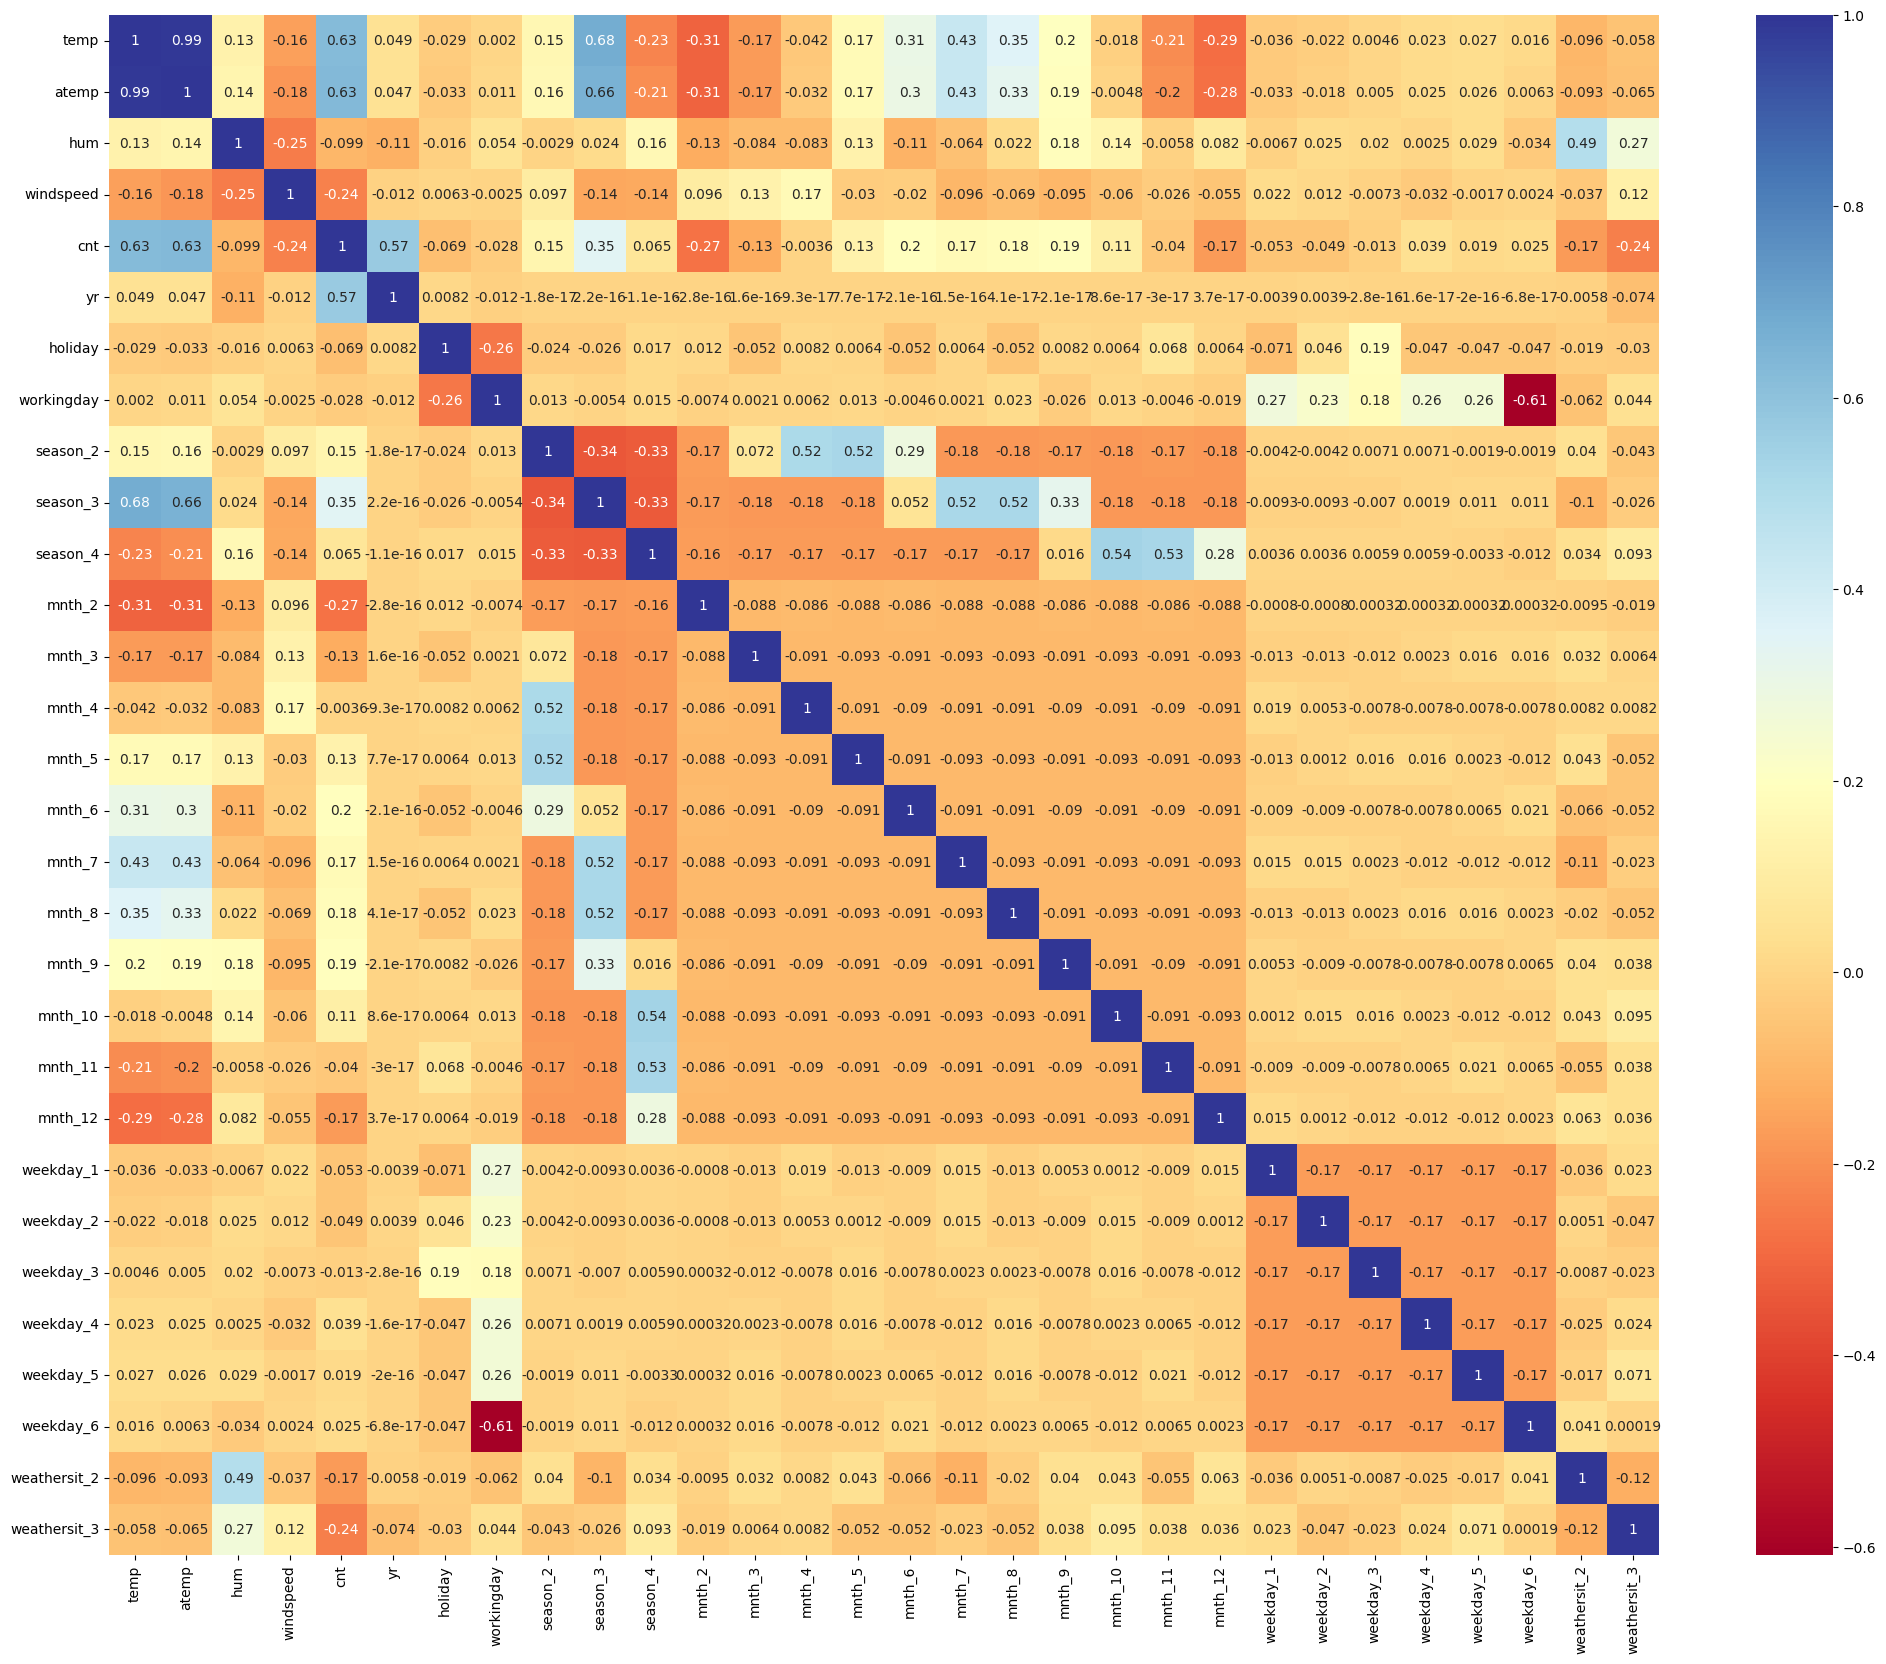

In [111]:
plt.figure(figsize=(25,20))
sns.heatmap(df_new.corr(),annot=True,cmap="RdYlBu")

1. Multicollinearity has been clearly explained by the heatmap
2. This will be used further while validating the model based on the p-value and VIF, whether to eliminate or conserve the column from the model.

#  We need to normalize the data to proceed to model training

# RESCALING THE FEATURES

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [113]:
#check values before scaling
df_train.head()

temp    atemp      hum  windspeed   cnt  yr  holiday  workingday  \
653  19.201653  23.0423  55.8333  12.208807  7534   1        0           1   
576  29.246653  33.1448  70.4167  11.083475  7216   1        0           1   
426  16.980847  20.6746  62.1250  10.792293  4066   1        0           0   
728  10.489153  11.5850  48.3333  23.500518  1796   1        0           1   
482  15.443347  18.8752  48.9583   8.708325  4220   1        0           0   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
653         0         0  ...        0        0          0          0   
576         0         1  ...        0        0          0          0   
426         0         0  ...        0        0          0          0   
728         0         0  ...        0        1          1          0   
482         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
653          1          0          0          0             0             0  
576          1          0          0          0             0             0  
426          0          0          0          0             1             0  
728          0          0          0          0             0             0  
482          0          0          0          0             1             0  

[5 rows x 30 columns]

Apply the MinMaxScaler to only the numerical variables

In [114]:
#apply scaler() to num variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [115]:
#checking values after scaling
df_train.head()

temp     atemp       hum  windspeed       cnt  yr  holiday  \
653  0.509887  0.501133  0.575354   0.300794  0.864243   1        0   
576  0.815169  0.766351  0.725633   0.264686  0.827658   1        0   
426  0.442393  0.438975  0.640189   0.255342  0.465255   1        0   
728  0.245101  0.200348  0.498067   0.663106  0.204096   1        0   
482  0.395666  0.391735  0.504508   0.188475  0.482973   1        0   

     workingday  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653           1         0         0  ...        0        0          0   
576           1         0         1  ...        0        0          0   
426           0         0         0  ...        0        0          0   
728           1         0         0  ...        0        1          1   
482           0         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          0          1          0          0          0             0   
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [116]:
df_train.describe()

temp       atemp         hum   windspeed         cnt          yr  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.650369    0.320768    0.513620    0.507843   
std      0.225844    0.212385    0.145882    0.169797    0.224593    0.500429   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.538643    0.199179    0.356420    0.000000   
50%      0.540519    0.526811    0.653714    0.296763    0.518638    1.000000   
75%      0.735215    0.688457    0.754830    0.414447    0.684710    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          holiday  workingday    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.025490    0.711765    0.245098    0.262745  ...    0.086275   
std      0.157763    0.453386    0.430568    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    1.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    1.000000    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.154902    0.152941    0.135294    0.143137    0.147059   
std      0.278131    0.362166    0.360284    0.342373    0.350557    0.354512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.129412      0.343137      0.029412  
std      0.335985      0.475223      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

# BUILDING A LINEAR MODEL

In [117]:
#Let's divide the X and y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

Recursive function Elimination : Using LinearRegression Function from Scikit Learn

In [118]:
# import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [119]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [120]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [121]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'yr', 'holiday', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [122]:
X_train.columns[~rfe.support_]

Index(['atemp', 'workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [123]:
#creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# BUILDING LINEAR MODEL USING STATS MODEL

mODEL 1
vif CHECK

In [124]:
#Check for the VIF values for the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create A dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values , i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

Features    VIF
0           temp  24.64
1            hum  15.55
6       season_3   8.80
2      windspeed   3.80
5       season_2   3.73
7       season_4   3.13
13  weathersit_2   2.15
3             yr   2.04
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.64
11        mnth_9   1.51
8         mnth_3   1.33
14  weathersit_3   1.19
4        holiday   1.05

In [125]:
import statsmodels.api as sm

# add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

#Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [126]:
lr1.params

const           0.237574
temp            0.484667
hum            -0.178353
windspeed      -0.183595
yr              0.230385
holiday        -0.089060
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [127]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          2.95e-189
Time:                        18:40:46   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

# Model 2

In [128]:
#As we can see 'hum' has high VIF value,let's remove this variable and see the change in the model
#we don't remove the 'temp' variable as it had a good linear relationship with the dependent variable as seen in visualisations during EDA

X_train_new = X_train_rfe.drop(['hum'],axis=1)

#VIF check ****

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe containing names of all features and their VIFs
vif= pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
0           temp  15.99
5       season_3   8.42
4       season_2   3.68
1      windspeed   3.46
6       season_4   2.97
2             yr   2.04
9         mnth_8   1.85
8         mnth_5   1.68
11       mnth_10   1.62
12  weathersit_2   1.50
10        mnth_9   1.49
7         mnth_3   1.31
13  weathersit_3   1.10
3        holiday   1.04

In [130]:
#add a constant
X_train_lm2 = sm.add_constant(X_train_new)

#create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [131]:
lr2.params

const           0.136540
temp            0.450833
windspeed      -0.149773
yr              0.234389
holiday        -0.090058
season_2        0.121362
season_3        0.056459
season_4        0.148984
mnth_3          0.035027
mnth_5          0.020101
mnth_8          0.045322
mnth_9          0.110462
mnth_10         0.040484
weathersit_2   -0.083753
weathersit_3   -0.293342
dtype: float64

In [132]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.03e-185
Time:                        18:40:47   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1365      0.017      7.893   

Model 3

1. **REMOVE season_3 as it has high VIF**

In [133]:
X_train_new = X_train_new.drop(['season_3'],axis=1)

In [134]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create df for VIF, and features
vif= pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values,i)for i in range (X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0           temp  5.22
1      windspeed  3.32
4       season_2  2.31
2             yr  2.01
5       season_4  1.98
7         mnth_5  1.62
8         mnth_8  1.62
10       mnth_10  1.60
11  weathersit_2  1.50
9         mnth_9  1.35
6         mnth_3  1.22
12  weathersit_3  1.10
3        holiday  1.04

In [135]:
#add a constant
X_train_lm3=sm.add_constant(X_train_new)

#create a first fitted model
lr3 = sm.OLS(y_train,X_train_lm3).fit()

In [136]:
lr3.params

const           0.129308
temp            0.513804
windspeed      -0.153613
yr              0.232811
holiday        -0.093004
season_2        0.097888
season_4        0.131205
mnth_3          0.026771
mnth_5          0.011591
mnth_8          0.060241
mnth_9          0.123593
mnth_10         0.034108
weathersit_2   -0.083758
weathersit_3   -0.289535
dtype: float64

In [137]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.33e-185
Time:                        18:40:49   Log-Likelihood:                 500.65
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     496   BIC:                            -914.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.552   

# Model 4

In [138]:
#removing the variable 'mnth_10' based on its very High p-value.
X_train_new = X_train_new.drop(['mnth_10'],axis=1)

**VIF CHECK**

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features'] =X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0           temp  5.11
1      windspeed  3.32
4       season_2  2.30
2             yr  2.01
7         mnth_5  1.62
8         mnth_8  1.60
5       season_4  1.53
10  weathersit_2  1.50
9         mnth_9  1.32
6         mnth_3  1.22
11  weathersit_3  1.08
3        holiday  1.04

In [140]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train,X_train_lm4).fit()

In [141]:
lr4.params

const           0.124965
temp            0.522171
windspeed      -0.151546
yr              0.232509
holiday        -0.094155
season_2        0.096544
season_4        0.142919
mnth_3          0.026958
mnth_5          0.010932
mnth_8          0.057163
mnth_9          0.118614
weathersit_2   -0.082895
weathersit_3   -0.284093
dtype: float64

In [142]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          5.67e-186
Time:                        18:40:52   Log-Likelihood:                 498.74
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     497   BIC:                            -916.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1250      0.017      7.342   

In [143]:
#removing the variable month 3 as it has high p value
X_train_new=X_train_new.drop(['mnth_3'],axis=1)

In [144]:
#VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i)for i in range (X_train_new.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0           temp  5.11
1      windspeed  3.16
4       season_2  2.28
2             yr  2.01
7         mnth_8  1.59
6         mnth_5  1.58
5       season_4  1.49
9   weathersit_2  1.49
8         mnth_9  1.31
10  weathersit_3  1.08
3        holiday  1.04

# Model 5

In [145]:
#add a constant
X_train_lm5 = sm.add_constant(X_train_new)

#create fitted model
lr5 = sm.OLS(y_train,X_train_lm5).fit()

In [146]:
lr5.params


const           0.131395
temp            0.516482
windspeed      -0.149015
yr              0.232625
holiday        -0.097031
season_2        0.098105
season_4        0.138353
mnth_5          0.005777
mnth_8          0.054533
mnth_9          0.116466
weathersit_2   -0.082762
weathersit_3   -0.282689
dtype: float64

In [147]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.94e-186
Time:                        18:40:52   Log-Likelihood:                 497.03
No. Observations:                 510   AIC:                            -970.1
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1314      0.017      7.870   

# Model 6

In [148]:
X_train_new = X_train_new.drop(['mnth_5'],axis=1)


In [149]:
#vif check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create new dataframe for VIF
vif= pd.DataFrame()
vif["Feeatures"]=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i)for i in range (X_train_new.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Feeatures   VIF
0          temp  5.01
1     windspeed  3.10
2            yr  2.00
4      season_2  1.81
6        mnth_8  1.58
5      season_4  1.49
8  weathersit_2  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
3       holiday  1.04

In [150]:
#add constant
X_train_lm6=sm.add_constant(X_train_new)
#fit model
lr6=sm.OLS(y_train,X_train_lm6).fit()

In [151]:
lr6.params

const           0.131241
temp            0.517361
windspeed      -0.149737
yr              0.232489
holiday        -0.097109
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834
dtype: float64

In [152]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.26e-187
Time:                        18:40:54   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871      0.000       0.098       0.164
temp             0.5174      0.022     23.564      0.000       0.474       0.560
windspeed       -0.1497      0.025     -5.956      0.000      -0.199      -0.100
yr               0.2325      0.008     28.202      0.000       0.216       0.249
holiday         -0.0971      0.026     -3.715      0.000      -0.148      -0.046
season_2         0.1000      0.011      8.995      0.000       0.078       0.122
season_4         0.1383      0.011     13.003      0.000       0.117       0.159
mnth_8           0.0542      0.017      3.253      0.001       0.021       0.087
mnth_9           0.1162      0.016      7.045      0.000       0.084       0.149
weathersit_2    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
weathersit_3    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model Interpretation

# Hypothesis testing
1. **Null Hypothesis H0 : Bi(Beta Coefficients) = 0**
2. **Alternate Hypothesis H1 : Bi(Beta Coefficients) != 0**

#The coefficients obtained for each independent variables after lr6 model training is :
1. const           0.131241
2. temp            0.517361
3. windspeed      -0.149737
4. yr              0.232489
5. holiday        -0.097109
6. season_2        0.099972
7. season_4        0.138343
8. mnth_8          0.054165
9. mnth_9          0.116177
10. weathersit_2   -0.082534
11. weathersit_3   -0.282834

#Insights : From lr6, it's evident that the coefficients are non-zero. Hence,we Reject Null Hypothesis.
##Therefore, Alternate Hypothesis is Accepted

#F-statistic is used to test the overall significance of the model
##HIGHER the F-Statistic, More SIGNIFICANT the model is.

1. F-statistic:	251.3
2. Prob (F-statistic):	1.26e-187 i.e., 0

1. The F-Statistics value of 251.3 **which is Greater than 1**,
2. And the p-value of 0.001 **which is nearly 0** signifies that the ***OVERALL MODEL IS SIGNIFICANT***

#The best fitted model after lr6 is :
##y =  0.131241(**const**)+0.517361(**temp**)-0.149737(**windspeed**)+0.232489(**yr**)-0.097109(**holiday**)+0.099972(**season_2**) + 0.138343(**season_4**)+0.054165(**mnth_8**)+0.116177(**mnth_9**)-0.082534 (**weathersit_2**)-0.282834(**weathersit_3**)

**Const : 0.131 , with the unit increase in constant, the bike-share increases by 0.1312. that is, even if there is no other features available, the Bike-shares can still has a linear increase by a factor of 0.131.**

1. Temp: The temp variable with **0.5173 constant** , signifies the unit increase in TEMPERATURE LINEARLY increases the Bike-share numbers by 0.5173 units.

2. windspeed: The windspeed variable has a coefficient **-0.1497**, ***With the unit increase in windspeed,THE BIKE_SHARE LINEARLY DECREASES BY A UNIT OF 0.1497.***

3. yr : YR has a coefficient **0.232** ,***WITH THE UNIT INCREASE IN YR VARAIBLE,THE BIKE-SHARE LINEARLY INREASES BY A FACTOR OF 0.232***

4. holiday : holiday has a coefficient of "-0.09", ***WITH THE UNIT INCREASE IN THE HOLIDAY VARIABLE, THERE IS A LINEAR DECREASE IN THE BIKE-SHARES BY A FACTOR OF 0.09.***

5. season_2 : season_2 has a coefficient of "0.099" ,***WITH THE UNIT INCREASE IN THE season_2 variable,THERE IS A LINEAR INCREASE IN THE BIKE - SHARES BY A FACTOR OF 0.099.***

6. season_4 : season_4 has a coefficient of "0.138" ,***WITH THE UNIT INCREASE IN THE season_4 variable,THERE IS A LINEAR INCREASE IN THE BIKE-SHARES BY A FACTOR OF 0.138.***

7. mnth_8 : mnth_8 has a coefficient of "0.054" ,***WITH THE UNIT INCREASE IN THE mnth_8 variable,THERE IS A LINEAR INCREASE IN THE BIKE-SHARES BY A FACTOR OF 0.054.***

8. mnth_9 : mnth_8 has a coefficient of "0.116" ,***WITH THE UNIT INCREASE IN THE mnth_9 variable,THERE IS A LINEAR INCREASE IN THE BIKE-SHARES BY A FACTOR OF 0.116.***

9. weathersit_2 : weathersit_2 has a coefficient of "-0.082" ,***WITH THE UNIT INCREASE IN THE weathersit_2 variable,THERE IS A LINEAR decrease IN THE BIKE-SHARES BY A FACTOR OF 0.082.***

10. weathersit_3 : weathersit_3 has a coefficient of "-0.283" ,***WITH THE UNIT INCREASE IN THE weathersit_3 variable,THERE IS A LINEAR decrease IN THE BIKE-SHARES BY A FACTOR OF 0.283.***

#Error Analysis
##RESIDUAL Analysis OF TRAINING DATA

Text(0.5, 0, 'error')

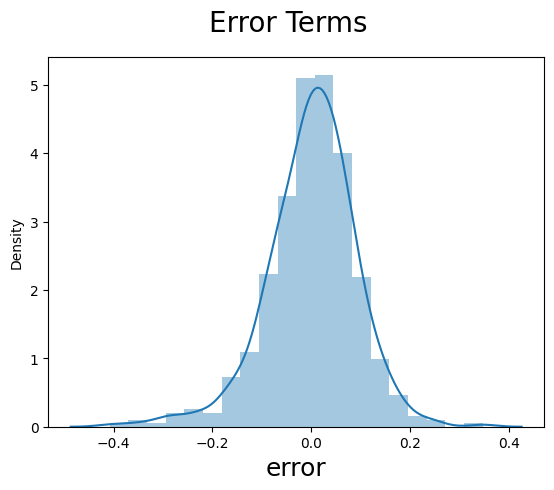

In [153]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train - y_train_pred
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('error',fontsize=18)

Therefore, THE ERROR TERMS ARE NORMALLY DISTRIBUTED WITH A MEAN OF 0. HENCE THE MODEL IS GOOD FIT

#ASSUMPTION OF LINEAR REGRESSION ARE VALID

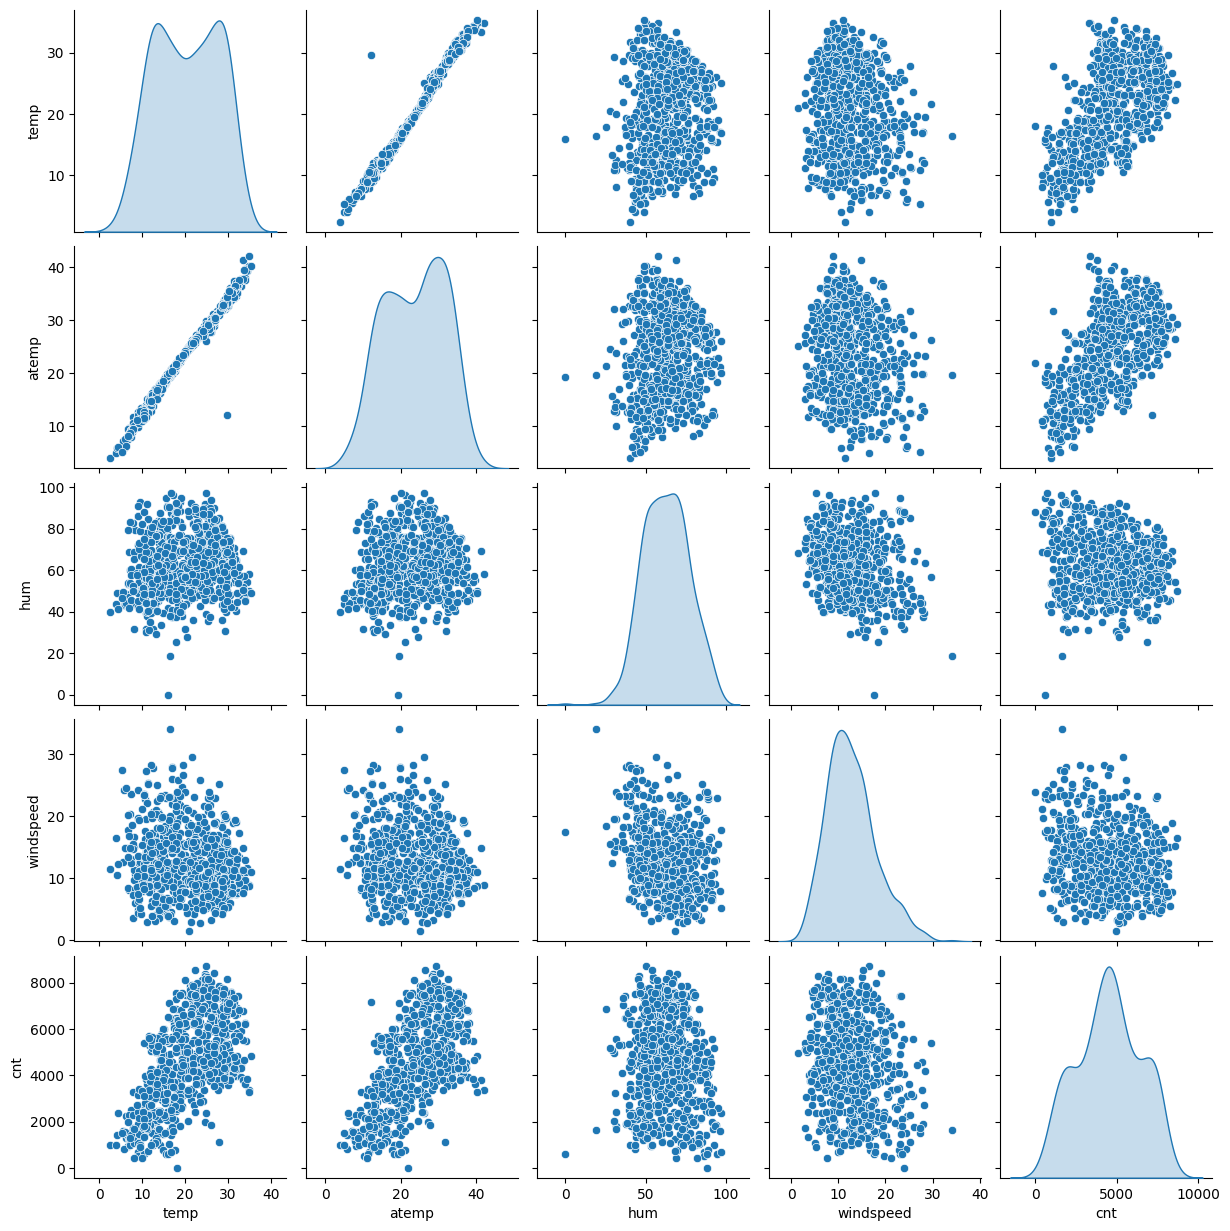

In [154]:
df_new = df_new[['temp','atemp','hum','windspeed','cnt']]

sns.pairplot(df_new,diag_kind='kde')
plt.show()

##'temp','atemp'and 'cnt have a linear relationship

# There is no multi-collinearity between variables

In [155]:
# Let's check VIF values of the FEATURE VARIABLE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create a dataframe for vif

vif=pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif



Features   VIF
0          temp  5.01
1     windspeed  3.10
2            yr  2.00
4      season_2  1.81
6        mnth_8  1.58
5      season_4  1.49
8  weathersit_2  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
3       holiday  1.04

# There is no multicollinearity between predictive variables, and all VIFs are in the permissible range.... Around 5.

##Let's make predictions using FINAL MODEL

In [156]:
df_test.head()

temp     atemp      hum  windspeed   cnt  yr  holiday  workingday  \
184  29.793347  33.27085  63.7917   5.459106  6043   0        1           0   
535  32.082500  36.04875  59.2083   7.625404  6211   1        0           1   
299  19.270000  22.85230  81.2917  13.250121  2659   0        0           0   
221  31.433347  34.24915  42.4167  13.417286  4780   0        0           1   
152  29.315000  32.19710  30.5000  19.583229  4968   0        0           0   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
184         0         1  ...        0        0          0          0   
535         1         0  ...        0        0          0          0   
299         0         0  ...        0        0          0          0   
221         0         1  ...        0        0          0          0   
152         1         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
184          1          0          0          0             1             0  
535          0          1          0          0             0             0  
299          0          0          0          1             1             0  
221          0          0          1          0             0             0  
152          0          0          0          1             0             0  

[5 rows x 30 columns]

In [163]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [165]:
df_test.head()

temp     atemp       hum  windspeed       cnt  yr  holiday  \
184  0.837241  0.778767  0.534223   0.149393  0.704300   0        1   
535  0.911423  0.855132  0.470417   0.231142  0.725421   1        0   
299  0.496221  0.492359  0.777843   0.443398  0.278853   0        0   
221  0.890387  0.805661  0.236659   0.449707  0.545512   0        0   
152  0.821739  0.749249  0.070765   0.682387  0.569148   0        0   

     workingday  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
184           0         0         1  ...        0        0          0   
535           1         1         0  ...        0        0          0   
299           0         0         0  ...        0        0          0   
221           1         0         1  ...        0        0          0   
152           0         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          1          0          0          0             1   
535          0          0          1          0          0             0   
299          0          0          0          0          1             1   
221          0          0          0          1          0             0   
152          0          0          0          0          1             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  

[5 rows x 30 columns]

In [164]:
df_test.describe()

temp       atemp         hum   windspeed         cnt          yr  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.546312    0.530942    0.508750    0.418870    0.516216    0.479452   
std      0.249189    0.228159    0.201253    0.188111    0.238702    0.500722   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.328479    0.333829    0.358469    0.283817    0.359882    0.000000   
50%      0.546045    0.547913    0.494200    0.402533    0.520241    0.000000   
75%      0.759735    0.720622    0.651165    0.524362    0.682487    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          holiday  workingday    season_2    season_3  ...     mnth_11  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.036530    0.639269    0.264840    0.246575  ...    0.073059   
std      0.188034    0.481313    0.442259    0.432005  ...    0.260830   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    1.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    1.000000    1.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.123288    0.155251    0.141553    0.132420   
std      0.282125    0.324202    0.329520    0.362974    0.349389    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.173516      0.319635      0.027397  
std      0.379560      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

In [166]:
y_test = df_test.pop('cnt')
X_test = df_test


In [167]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          219 non-null    float64
 1   atemp         219 non-null    float64
 2   hum           219 non-null    float64
 3   windspeed     219 non-null    float64
 4   yr            219 non-null    int64  
 5   holiday       219 non-null    int64  
 6   workingday    219 non-null    int64  
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [168]:
#select vars that wer part of final model

col = X_train_new.columns
X_test=X_test[col]

#ADDconstant
X_test_lm6=sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   temp          219 non-null    float64
 2   windspeed     219 non-null    float64
 3   yr            219 non-null    int64  
 4   holiday       219 non-null    int64  
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_8        219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [170]:
#making the predictions work on test set
y_pred = lr6.predict(X_test_lm6)

# Model EValuation

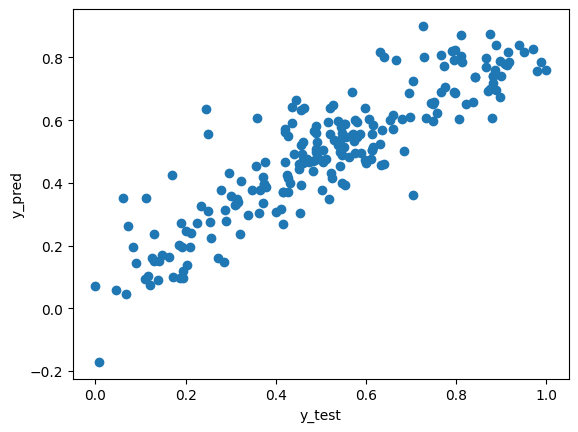

In [174]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [175]:
#R square value for test set
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7843451797101205

In [178]:
r2=0.7843451797101205

In [176]:
#Shape of X_test
X_test.shape

(219, 10)

In [179]:
#adjusted r2 value calculation
#formula: adjusted_r2=1-(1-r2)*(n-1) / (n-p-1)

#n is total values present
n=X_test.shape[0]

#number of features a.k.a predictor variables/columns of data
p = X_test.shape[1]

#adjusted_r2
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)



In [180]:
adjusted_r2

0.7739771595038762

# COMPARISION OF FINAL RESULTS FOR TRAIN AND TEST DATASETS

1. Train R^2 : 0.834
2. Train Adjusted R^2 : 0.831
3. Test R^2 : 0.784
4. Test Adjusted R^2 : 0.774
5. This seems to be a moderately good model which will generalise various datasets

# FINAL REPORT
## As per the final model, top3 predictor variables are:
y = 0.131241(const)+0.517361(temp)-0.149737(windspeed)+0.232489(yr)-0.097109(holiday)+0.099972(season_2) + 0.138343(season_4)+0.054165(mnth_8)+0.116177(mnth_9)-0.082534 (weathersit_2)-0.282834(weathersit_3)

*   Temperature(temp) - A coefficient of '0.517. with unit increase in temp the bike-sharing count increases linearly.

*   Weather Situation 3(weathersit_3) - A coefficient of '-0.283' indicated that, a unit increase in weathersit3 variable , the bike sharing and hire numbers decreases by 0.283 units.


*   Year(yr) : A coefficient of 0.232
With unit increase in yr variable ,the bike hire numbers increases linearly by 0.232 units


#Therefore, while planning to get the best out of this business , IT IS BETTER TO CONSIDER ALL OF THESE 3 PREDICTORS WITH UTMOST IMPORTANCE TO ACHIEVE MAXIMUM BOOKING








**The next best features are:**


1. Season 4 : coefficient is 0.138,unit increase in season 4, increases the bike hiring by 0.138 units

2. month_9 :  coefficient is 0.116,unit increase in month_9, increases the bike hiring by 0.116 units

3. windspeed : coefficient is '-0.149',unit increase in windspeed, decreases the bike hiring by 0.149 units



* **Weathersit_1:clear,few clouds,partly cloudy,partly cloudy**
* **Weathersit_3: Light snow,light rain +thunderstorm+scattered clouds,light rain+scattered clouds**

* **season4: winter**